In [4]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree ,ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve
import pandas as pd
import numpy as np
%pylab inline

/Users/dzisandy/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/dzisandy/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Генерация данных

In [5]:
datas = pd.read_csv('XBTUSD_20170101_20180226.csv')
# beginnig in 20171215 8: 56 :00
datas = datas.drop(['<TICKER>','<PER>'], axis =1)
#pyplot.plot(np.linspace(0,100,106000),datas['<OPEN>'])
#datas = datas.drop(range(0,5000), axis =0)
datas = datas[:5000]
datas.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOLUME>
0,20170101,30000,968.29,968.29,968.29,968.29,0.0
1,20170101,30100,968.29,968.76,968.49,968.70,12993.0
2,20170101,30200,968.70,968.70,967.20,968.43,73800.0
3,20170101,30300,968.43,968.00,967.21,967.21,3500.0
4,20170101,30400,967.21,967.21,966.74,966.97,15969.0


In [14]:
def mean_period(datas, period):
    averages = []
    for i in np.arange(period,datas.shape[0],period):
        averages.append(datas['<OPEN>'][i-period:i].mean())
    averages.append(datas['<OPEN>'][i:datas.shape[0]].mean())
    return averages

#test function. the result must work as ensemble
def candles(strategy, period, datas):  #strategy: 1 - open/close 2 - open/percent 3 -  high/low
    size = []
    averages = mean_period(datas,period)
    
    if (strategy == 1):
        for i in range(int(datas.shape[0]/period)): 
            size.append(datas['<OPEN>'][(i)*period] - datas['<CLOSE>'][period - 1 +(i)*period])
            size[i] = 100* size[i]/averages[i]
        return size
    
    if (strategy == 2): 
        percent = 0.01 # заданный процент
        for i in range(int(datas.shape[0]/period) - 2):
            if datas['<OPEN>'][(i)*period] >= datas['<CLOSE>'][(i+1)*period] + averages[i]*percent/100:
                size.append(-1)
            else:    
                size.append(1)
        return size
    
    if (strategy == 3):
        pass
   

In [16]:
candles(1, 2, datas)

[-0.042342686591835287,
 0.15383582929385317,
 0.024816718195825527,
 0.0082731376391609931,
 0.0,
 0.0,
 0.19555702711930906,
 0.014507772020723975,
 -0.013473457289139922,
 0.019691261743511428,
 0.0,
 0.0,
 0.0,
 -0.029021558872314099,
 0.055969569137973005,
 -0.038352898494390067,
 -0.0010363660859552606,
 -0.0093271981096911486,
 -0.090043935230466374,
 -0.19549735457944653,
 -0.0051663833766518955,
 0.0,
 0.076460498853093459,
 -0.03308382614448703,
 0.0,
 0.0,
 0.0,
 -0.070273342634223496,
 0.12292372531196333,
 -0.075456485898425046,
 -0.039263905105340453,
 0.0,
 -0.01033004493569782,
 0.0,
 0.012398487384539556,
 0.10126059103120667,
 0.0,
 0.073422957600831062,
 0.0010348913622783035,
 0.0,
 0.0,
 0.028977108084610334,
 0.10357327809425168,
 0.10367582642593139,
 0.0,
 -0.078838174273857975,
 0.0,
 0.0,
 0.0,
 -0.15443535222143429,
 0.18122977346278318,
 0.052891122069597549,
 0.033195192921130295,
 0.0,
 0.0,
 0.0010376996274648899,
 -0.092356225224662886,
 0.0,
 0.11929769

In [151]:
np.histogram(candles(1,3,datas))

(array([   2,    2,   16,  186, 1211,  222,   22,    3,    0,    1]),
 array([-1.24573176, -0.97290647, -0.70008118, -0.42725589, -0.1544306 ,
         0.11839469,  0.39121998,  0.66404527,  0.93687056,  1.20969585,
         1.48252113]))

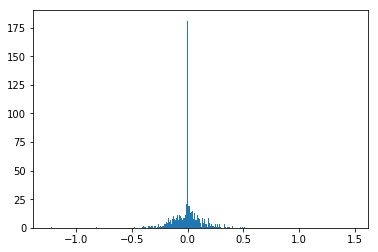

In [157]:
plt.hist(candles(1,3,datas), bins = 1000)  
plt.show()

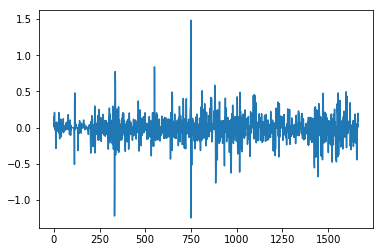

In [160]:
plt.plot(candles(1,3,datas))

In [7]:
np.array(datas['<OPEN>'])

array([  968.29,   968.29,   968.7 , ...,  1082.88,  1083.26,  1085.84])